In [2]:
import numpy as np
import pandas as pd
import pymc3 as pm;
from ipywidgets import interact
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as patches;

## Building a probabilistic model for prediction "Water on a planet"

$N =$ Number of observation

$\theta \sim Uniform(0,1)$ Proportion of Water on the planet

$p_{water} \sim Binomial(\theta, N)$

In [49]:
obs = [0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0]
n_obs = len(obs)
water_obs = sum(obs)

In [61]:
with pm.Model() as planet_model:
    theta = pm.Uniform("theta",0,1)
    p_water = pm.Binomial("p_water",p=theta, n=n_obs, observed = water_obs)
    trace = pm.sample(5000, chains=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 2 jobs)
NUTS: [theta]
Sampling 3 chains, 0 divergences: 100%|████| 16500/16500 [00:09<00:00, 1759.22draws/s]


### Convert Model results from PPL to Arviz.InferenceData

In [62]:
water_data = az.from_pymc3(trace=trace) #store the result for later use

### Inspect InferenceData

In [63]:
water_data

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [64]:
water_data.posterior

<xarray.Dataset>
Dimensions:  (chain: 3, draw: 5000)
Coordinates:
  * chain    (chain) int32 0 1 2
  * draw     (draw) int32 0 1 2 3 4 5 6 7 ... 4993 4994 4995 4996 4997 4998 4999
Data variables:
    theta    (chain, draw) float64 0.3136 0.3136 0.2748 ... 0.3484 0.3484 0.3127
Attributes:
    created_at:                 2020-03-15T18:11:41.271014
    inference_library:          pymc3
    inference_library_version:  3.8

In [65]:
water_data.to_netcdf('data/WaterResults.nc') #save it disk

'data/WaterResults.nc'

## probability that the next planet has water

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000214F2BC29E8>],
      dtype=object)

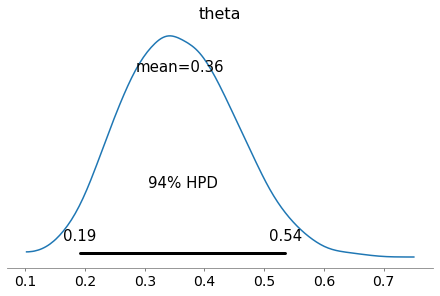

In [66]:
az.plot_posterior(trace)

In [67]:
az.summary(water_data)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,0.358,0.094,0.191,0.536,0.001,0.001,6053.0,6053.0,6083.0,10486.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214F0DD80B8>,
      dtype=object)

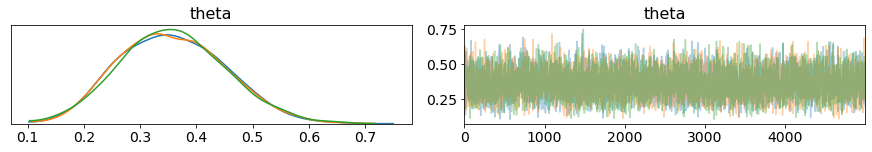

In [68]:
az.plot_trace(water_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214F3EAA470>,
      dtype=object)

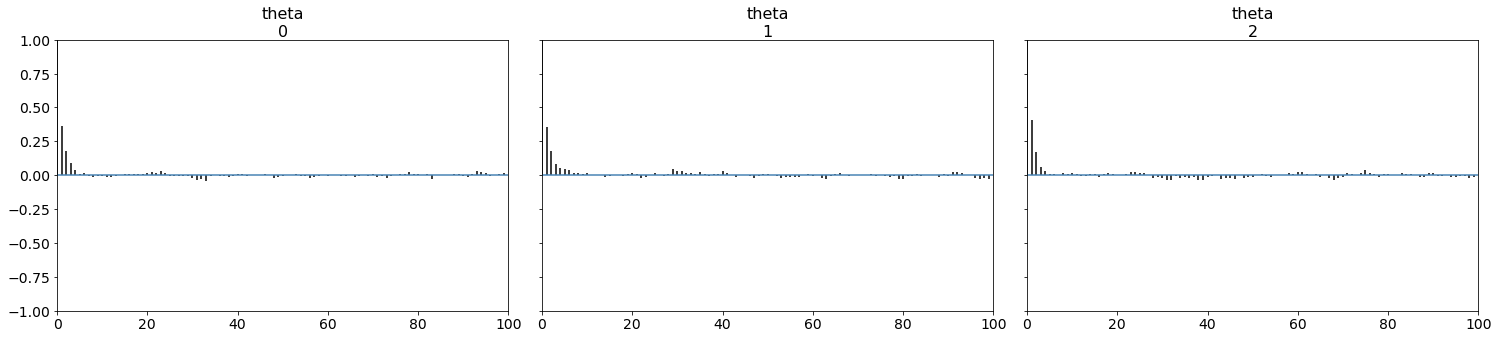

In [69]:
az.plot_autocorr(water_data)

(<Figure size 432x309.6 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000214F43139E8>],
       dtype=object))

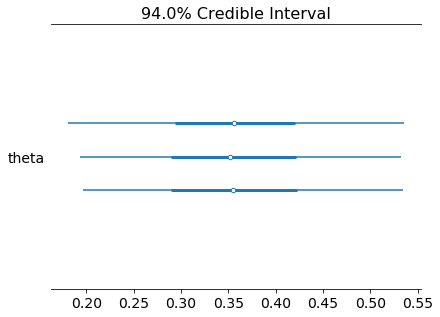

In [70]:
az.plot_forest(water_data)

In [71]:
water_data.observed_data

<xarray.Dataset>
Dimensions:        (p_water_dim_0: 1)
Coordinates:
  * p_water_dim_0  (p_water_dim_0) int32 0
Data variables:
    p_water        (p_water_dim_0) float64 8.0
Attributes:
    created_at:                 2020-03-15T18:11:41.815153
    inference_library:          pymc3
    inference_library_version:  3.8